## 第五章 非线性分类器

### 一、分段线性判别函数

分段线性判别函数的思想时把每个类$\omega_i$分为$l_i$个子类$\omega_i^1, \omega_i^2, \cdots, \omega_i^{l_i}$，然后把这些子类通过线性分类器分别进行判别。

首先导包，生成数据

X是样本矩阵，每一行是一个样本。

real_class是样本的真实类别，共有两类，用1，-1表示。

In [1]:
import numpy as np
import matplotlib.pyplot as plt

X = np.r_[
    np.random.randn(20, 2) + [-3.0, -3.0],
    np.random.randn(20, 2) + [3.0, 3.0],
    np.random.randn(20, 2) + [-3.0, 3.0],
    np.random.randn(60, 2) + [2.5, -2.5],
]
real_class = 60 * [1] + 60 * [-1]

print(X)
print(real_class)

[[-2.8596884  -2.91013719]
 [-2.96036867 -3.76759352]
 [-2.45232371 -3.81112585]
 [-2.81463743 -3.0322976 ]
 [-2.53232774 -3.13371034]
 [-3.58884826 -1.98218639]
 [-1.94898014 -3.41878915]
 [-3.92393327 -3.00299313]
 [-3.22926413 -3.91415201]
 [-2.00017122 -0.655559  ]
 [-3.82311755 -3.14225998]
 [-2.20693374 -2.85972216]
 [-1.13815618 -2.4476432 ]
 [-3.20174889 -3.5366999 ]
 [-4.73176613 -2.28081315]
 [-3.21138949 -2.82304332]
 [-3.02053153 -2.233528  ]
 [-3.65132176 -2.90479104]
 [-1.86400152 -3.01038688]
 [-3.57577913 -1.97612595]
 [ 2.86371116  3.60133161]
 [ 2.19031897  1.4668165 ]
 [ 2.84430277  2.03555224]
 [ 1.53894925  3.52388876]
 [ 3.42484216  3.90159974]
 [ 2.36454127  2.32646446]
 [ 3.68764854  3.08490093]
 [ 2.85611011  3.26228861]
 [ 5.18420086  3.62832942]
 [ 4.35439525  2.25815245]
 [ 2.43407125  3.29680142]
 [ 3.11618441  2.30948419]
 [ 1.999856    3.34854309]
 [ 2.60900277  2.73841868]
 [ 3.63132665  2.0270284 ]
 [ 3.7156776   4.2036194 ]
 [ 4.59202357  3.66888632]
 

下面生成图像，显然1类由三个线性可分的子类构成，-1类由一个类构成

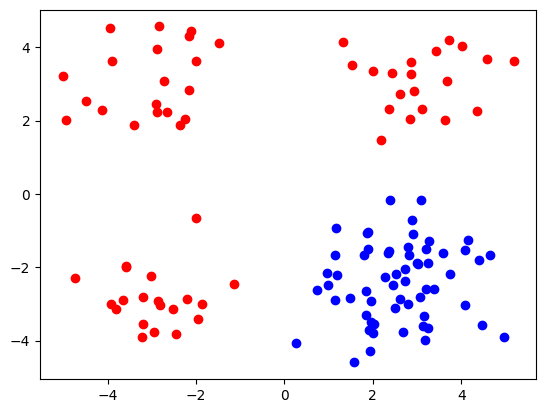

In [2]:
for i in range(120):
    if real_class[i] == -1:
        plt.scatter(X[i][0], X[i][1], c='b')
    else:
        plt.scatter(X[i][0], X[i][1], c='r')

plt.show()

#### 1. 分段线性距离分类器

这个分类器的思想就是算出每个子类$\omega_i^l$的均值$\mathbf{m}_i^l$，然后比较样本到均值的距离$||\mathbf{x} - \mathbf{m}_i^l||$，找最近的类别作为该样本的分类。这个算法思想非常简单，我就不写了。

#### 2. 一般的分段线性判别函数

这个分类器的思想是划分出子类之后，把每个子类的线性判别函数$g_i^l(\mathbf{y}) = \boldsymbol{\alpha}_i^l\cdot\mathbf{y}$算出来，然后根据判别函数进行分类，判别函数数值最大的就是样本所在的类。（这里的$\mathbf{y}$是增广后的样本，参见上一章）。

现在的核心问题是如何划分子类，书上给出了三种方法。

第一种是根据经验人为划分，或者可以用聚类算法划分。

第二种是边求权向量$\boldsymbol{\alpha_i^l}$边划分，算法如下：

1. 给定每个类别的子类数目（人为猜的），并且初始化每个子类的权向量$\boldsymbol{\alpha}_i^l$（用小的随机数即可）
2. 考察一个属于$\omega_j$类的训练样本$\mathbf{y}$，找出$\omega_j$类的子类中线性判别函数（$\boldsymbol{\alpha}_j^m\cdot\mathbf{y}$）的值最大的子类，假设是第$m$个子类
3. 如果刚求出的这个最大的线性判别函数的值比**其他所有类的所有子类**的线性判别函数的值**都大**，即$\boldsymbol{\alpha}_j^m \cdot\mathbf{y}>\boldsymbol{\alpha}_i^l\cdot \mathbf{y}, \forall i = 1,\cdots, c, i \neq j, l = 1, \cdots, l_i$，说明当前样本没有被错分，那么考察下一个样本
4. 否则就更新两个子类的权值。更新的两个子类有说法，要特别注意：更新的是**当前样本所属的类别的线性判别函数值最大的子类**和**当前样本被错分的类别的线性判别函数值最大的子类**。更新规则如下：

$$\begin{align}
\boldsymbol{\alpha}_j^m &+= \rho\mathbf{y}\\
\boldsymbol{\alpha}_i^n &-= \rho\mathbf{y}\\
\end{align}$$
$$\begin{align}
& \omega_j是当前样本属于的类\\
& \omega_i是当前样本被错分的类\\
& 即\boldsymbol{\alpha}_j^m \cdot\mathbf{y}\leqslant\boldsymbol{\alpha}_i^n\cdot \mathbf{y}\\
& m是\omega_j中线性判别函数最大的子类序号\\
& n是\omega_i中线性判别函数最大的子类序号\\
\end{align}$$

对于线性不可分的情况，可以使训练步长$\rho$逐渐变小来使算法强制收敛。（书里也没说具体怎么变小）

前面给出的数据集对于每个子类都是线性可分的，所以下面的算法里把$\rho$设为1了。

这种方法没有人为的划分子类，只是指定了子类的数量，样本属于哪个子类其实是自动划分的

求权向量实现代码如下：

In [0]:
def augment_matrix(_X: np.ndarray) -> np.ndarray:
    """
    将样本X矩阵增广为Y
    :param _X: 原样本矩阵
    :return: 增广后的样本矩阵
    """
    return np.concatenate((np.ones((_X.shape[0], 1)), _X), 1)

def get_alpha_piecewise_linear(_X: list[np.ndarray], _subclass_number: list[int]) -> (list[np.ndarray], int):
    """
    计算出每个子类的权向量
    :param _X: 每个类别的样本矩阵列表（增广前） _X[i]表示第i类的样本矩阵
    :param _subclass_number: 每个类别分出来的子类数量（一维向量） _subclass_number[i] = j表示第i类有j个子类
    :return: 每个子类的权向量数组 return[i][j]表示第i类的第j个子类的权向量
    """
    # 先求出每个类别样本的增广矩阵
    _Y: list[np.ndarray] = []
    N = 0  # 样本总数
    for _Xi in _X:
        _Y.append(augment_matrix(_Xi))
        N += _Y[-1].shape[0]

    d = _Y[0].shape[1]  # 样本维数
    c = len(_Y)         # 种类数量

    # 初始化权向量列表（随机数）
    _alphas: list[np.ndarray] = []
    for i in range(c):
        _alphas.append(np.random.randn(_subclass_number[i], d))

    # 下面开始考察每一个样本
    _iters = 0
    i, j, n = 0, 0, 0
    while n < N:
        if j >= _Y[i].shape[0]:
            i += 1
            j = 0
            if i >= c:
                i = 0
        # 当前考察的样本属于第i类
        max_g_of_right_class_value = -9999999
        max_g_of_right_class_index = 0
        g = _Y[i][j] @ _alphas[i].T
        for k in range(_subclass_number[i]):
            if g[k] > max_g_of_right_class_value:
                max_g_of_right_class_index = k
                max_g_of_right_class_value = g[k]

        # 考察每一个除了i之外的类别，计算判别函数，比较是否分类错误
        for k in range(c):
            if k == i:
                continue
            max_g_of_wrong_class_value = -9999999
            max_g_of_wrong_class_index = 0
            g = _Y[i][j] @ _alphas[k].T
            for l in range(_subclass_number[k]):
                if g[l] > max_g_of_wrong_class_value:
                    max_g_of_wrong_class_value = g[l]
                    max_g_of_wrong_class_index = l
            if max_g_of_wrong_class_value >= max_g_of_right_class_value:
                # 如果分类错误，则要更新权向量
                n = -1
                _iters += 1
                _alphas[i][max_g_of_right_class_index] += _Y[i][j]
                _alphas[k][max_g_of_wrong_class_index] -= _Y[i][j]
                break
            if _iters >= 100000:
                raise Exception('迭代100000次还不收敛，数据可能不是线性可分的')
        n += 1
        j += 1
    return _alphas, _iters

In [23]:
alphas, iters = get_alpha_piecewise_linear([X[:60], X[60:]], [3, 1])
print("第一类的所有子类的权向量（每一行是一个权向量）：\n", alphas[0])
print("第二类的所有子类的权向量（每一行是一个权向量）：\n", alphas[1])
print("迭代次数：", iters)

第一类的所有子类的权向量（每一行是一个权向量）：
 [[ 1.01848496e+00 -8.15113173e+00 -4.12926837e+00]
 [ 2.54386312e-01 -4.02457777e-01 -3.15953573e-03]
 [ 9.42934212e-01  1.35783124e+00  1.20361148e+01]]
第二类的所有子类的权向量（每一行是一个权向量）：
 [[-1.32262581  6.66700246 -6.23387516]]
迭代次数： 13


分类就比较好写了，直接计算所有类的所有子类的判别函数，找出最大的，判断样本属于最大的判别函数的类别

In [28]:
g_matrix = augment_matrix(X) @ np.concatenate([alphas[0], alphas[1]]).T
ans_piecewise_linear = []  # 最终的两类分类结果
ans_subclass = []          # 这个数组记录了样本分类到了哪个子类

# 找出最大的判别函数
for row in g_matrix:
    maxn = -99999
    subclass_of_this_sample = 0
    for i, g in enumerate(row):
        if maxn < g:
            subclass_of_this_sample = i
            maxn = g
    ans_subclass.append(subclass_of_this_sample)

print("这个数组显示了每个样本被分到了哪个子类（0，1，2是第一类的子类，3是第二类的子类）\n", ans_subclass)

# 接下来求出最终的分类结果

for sample in ans_subclass:
    if sample < 3:
        ans_piecewise_linear.append(1)
    else:
        ans_piecewise_linear.append(-1)

ans_piecewise_linear = np.array(ans_piecewise_linear)
print("最终分类结果：", ans_piecewise_linear)
print("正确率：", 1 - np.sum(abs(ans_piecewise_linear - real_class)) / 2 / X.shape[0])


这个数组显示了每个样本被分到了哪个子类（0，1，2是第一类的子类，3是第二类的子类）
 [0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 0, 2, 2, 2, 2, 2, 2, 0, 2, 2, 0, 0, 2, 2, 2, 2, 2, 2, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3]
最终分类结果： [ 1  1  1  1  1  1  1  1  1  1  1  1  1  1  1  1  1  1  1  1  1  1  1  1
  1  1  1  1  1  1  1  1  1  1  1  1  1  1  1  1  1  1  1  1  1  1  1  1
  1  1  1  1  1  1  1  1  1  1  1  1 -1 -1 -1 -1 -1 -1 -1 -1 -1 -1 -1 -1
 -1 -1 -1 -1 -1 -1 -1 -1 -1 -1 -1 -1 -1 -1 -1 -1 -1 -1 -1 -1 -1 -1 -1 -1
 -1 -1 -1 -1 -1 -1 -1 -1 -1 -1 -1 -1 -1 -1 -1 -1 -1 -1 -1 -1 -1 -1 -1 -1]
正确率： 1.0


通过上面的结果我们可以明显看出，虽然我的数据生成的时候有意的把第一类分成了三个线性可分的子类（每20个数据属于一个子类），但是由于上面的算法是自动划分子类，最终第一大类的样本并没有像预期那样，均匀的划分为三个子类。但是这并不影响最终结果的正确性。

第三种是分治的思想，通过分类树来一步一步进行。每次都把当前分类的部分用两类线性判别算法分出来，最后形成一棵分类的二叉树。
这个方法书上只简单的介绍了一下，而且实际操作中会有很多问题要解决。另外根据我的估算就算实现了这个算法效果也不好，会有非常严重的过拟合问题。所以我就不在这个算法上浪费时间了。

### 二. 二次判别函数

书上就简单提了一下，总体思想就是样本到均值的马氏距离的平方和固定阈值的比较。书中连阈值怎么求都没解释，这节也可以略过。

### 三、多层感知机神经网络

这个算法吴恩达的网课里面Course 2里面讲了，看不懂书可以去看看他的课，讲的很清楚。